In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bmi.csv')

In [3]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


<AxesSubplot:ylabel='Density'>

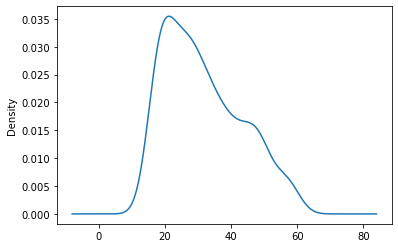

In [4]:
df['Age'].plot(kind ='kde')

In [5]:
df['Age'].skew()

0.5785459211988451

In [6]:
df.isnull().mean()*100

Age         0.0
Height      0.0
Weight      0.0
Bmi         0.0
BmiClass    0.0
dtype: float64

In [9]:
u =df['Age'].mean()

In [10]:
s = df['Age'].std()

In [28]:
df[(df['Age']<(u+s)) & (df['Age']>(u-s))]['Age']

111    43
112    43
113    43
114    43
115    43
       ..
734    43
735    24
736    34
738    25
739    35
Name: Age, Length: 475, dtype: int64

In [37]:
ex = df[(df['Age']<(u+3*s)) & (df['Age']>(u-3*s))]['Age'].value_counts().sum()

In [29]:
total = df['Age'].value_counts().sum()

In [38]:
per = (ex/total)*100

In [39]:
per

100.0

In [41]:
df['Age'].min()

15

In [42]:
data = pd.read_csv('placement.csv')

In [44]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [45]:
df.isnull().mean()*100

Age         0.0
Height      0.0
Weight      0.0
Bmi         0.0
BmiClass    0.0
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


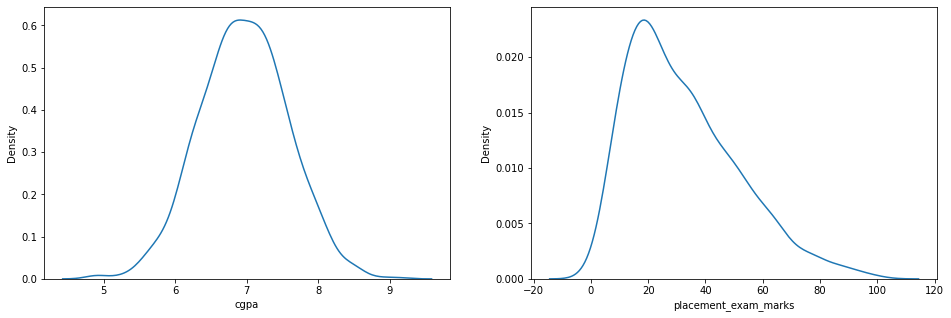

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['cgpa'],hist=False)

plt.subplot(122)
sns.distplot(data['placement_exam_marks'],hist=False)

plt.show()

In [49]:
print("Mean value of cgpa",data['cgpa'].mean())
print("Std value of cgpa",data['cgpa'].std())
print("Max value of cgpa",data['cgpa'].max())
print("Min value of cgpa",data['cgpa'].min())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Max value of cgpa 9.12
Min value of cgpa 4.89


In [51]:
print(f"Highest allowed {data['cgpa'].mean()+3*data['cgpa'].std()}")
print(f"Lowest allowed {data['cgpa'].mean()-3*data['cgpa'].std()}")

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [52]:
data[(data['cgpa']>8.80) | (data['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [53]:
new_df  = data[(data['cgpa']<8.80) & (data['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [57]:
data['cgpa_zscore'] = (data['cgpa']-data['cgpa'].mean())/data['cgpa'].std()

In [58]:
data.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [59]:
data[data['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [60]:
data[data['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [61]:
data[(data['cgpa_zscore']>3) | (data['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [62]:
# Trimming 2 
new_df = data[(data['cgpa_zscore']<3) & (data['cgpa_zscore']>-3)]

In [64]:
new_df.shape

(995, 4)

# Capping

In [65]:
upper_limit = data['cgpa'].mean()+3*data['cgpa'].std()
lower_limit = data['cgpa'].mean()-3*data['cgpa'].std()

In [67]:
upper_limit

8.808933625397168

In [68]:
lower_limit

5.113546374602832

In [69]:
data['cgpa'] = np.where(
    data['cgpa']>upper_limit,
    upper_limit,
    np.where(
        data['cgpa']<lower_limit,
        lower_limit,
        data['cgpa']
    )
)

In [71]:
data.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
362,7.25,21.0,1,0.468844
741,7.58,66.0,0,1.004647
826,7.05,32.0,0,0.144115
923,6.52,10.0,0,-0.716417
983,6.81,11.0,1,-0.245560


In [73]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64